In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [55]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [56]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [57]:
strings_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [58]:
for col in strings_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [59]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


# EDA

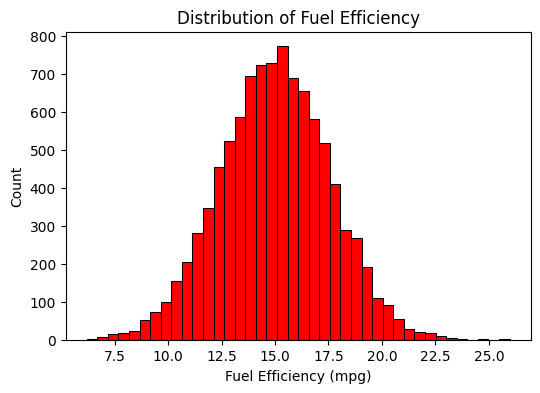

In [60]:
plt.figure(figsize=(6,4))
sns.histplot(df.fuel_efficiency_mpg, bins=40, color='red', alpha=1)
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Count')
plt.title('Distribution of Fuel Efficiency')
plt.show()

# Linear Regression

In [61]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

# Prepare X

In [62]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

# RMSE

In [63]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Regularization

In [64]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Base

In [65]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

# Q1 - missing values

In [66]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

# Q2 - horsepower median

In [67]:
df['horsepower'].median()

np.float64(149.0)

# Preparing the dataset

In [68]:
np.random.seed(42)
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Q3 - Mean vs 0's

### Mean

In [69]:
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()
df_test_mean = df_test.copy()

mean_value = df_train_mean['horsepower'].mean()

df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(mean_value)
df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(mean_value)
df_test_mean['horsepower'] = df_test_mean['horsepower'].fillna(mean_value)

In [70]:
y_train_mean = df_train_mean.fuel_efficiency_mpg.values
y_val_mean = df_val_mean.fuel_efficiency_mpg.values
y_test_mean = df_test_mean.fuel_efficiency_mpg.values

del df_train_mean['fuel_efficiency_mpg']
del df_val_mean['fuel_efficiency_mpg']
del df_test_mean['fuel_efficiency_mpg']

In [71]:
X_train_mean = df_train_mean[base].values
w_0, w = train_linear_regression(X_train_mean, y_train_mean)
y_train_pred_mean = w_0 + X_train_mean.dot(w)
print('mean train:', rmse(y_train_mean, y_train_pred_mean))

mean train: 0.46244121379599645


In [72]:
X_val_mean = df_val_mean[base].values
w_0, w = train_linear_regression(X_val_mean, y_val_mean)
y_val_pred_mean = w_0 + X_val_mean.dot(w)
print('validation:', rmse(y_val_mean, y_val_pred_mean))

validation: 0.4630826400124269


In [73]:
rmse_train_mean = rmse(y_train_mean, y_train_pred_mean)
print(round(rmse_train_mean,2))

0.46


In [74]:
rmse_val_mean = rmse(y_val_mean, y_val_pred_mean)
print(round(rmse_val_mean,2))

0.46


### 0's

In [75]:
df_train_mode = df_train.copy()
df_val_mode = df_val.copy()
df_test_mode = df_test.copy()

df_train_mode['horsepower'] = df_train_mode['horsepower'].fillna(0)
df_val_mode['horsepower'] = df_val_mode['horsepower'].fillna(0)
df_test_mode['horsepower'] = df_test_mode['horsepower'].fillna(0)

In [76]:
y_train_mode = df_train_mode.fuel_efficiency_mpg.values
y_val_mode = df_val_mode.fuel_efficiency_mpg.values
y_test_mode = df_test_mode.fuel_efficiency_mpg.values

del df_train_mode['fuel_efficiency_mpg']
del df_val_mode['fuel_efficiency_mpg']
del df_test_mode['fuel_efficiency_mpg']

In [77]:
X_train_mode = df_train_mode[base].values
w_0, w = train_linear_regression(X_train_mode, y_train_mode)
y_train_pred_mode = w_0 + X_train_mode.dot(w)

In [78]:
X_val_mode = df_val_mode[base].values
w_0, w = train_linear_regression(X_val_mode, y_val_mode)
y_val_pred_mode = w_0 + X_val_mode.dot(w)

In [79]:
rmse_train_mode = rmse(y_train_mode, y_train_pred_mode)
print('mode train:')
print(round(rmse_train_mode,2))

mode train:
0.52


In [80]:
rmse_val_mode = rmse(y_val_mode, y_val_pred_mode)
print('validation:')
print(round(rmse_val_mode,2))

validation:
0.52


# Q4

In [81]:
df_train_q4 = df_train.copy()
df_val_q4 = df_val.copy()
df_test_q4 = df_test.copy()

y_train_q4 = df_train_q4.fuel_efficiency_mpg.values
y_val_q4 = df_val_q4.fuel_efficiency_mpg.values
y_test_q4 = df_test_q4.fuel_efficiency_mpg.values

del df_train_q4['fuel_efficiency_mpg']
del df_val_q4['fuel_efficiency_mpg']
del df_test_q4['fuel_efficiency_mpg']

In [82]:
X_train_q4 = prepare_X(df_train_q4)
w_0, w = train_linear_regression(X_train_q4, y_train_q4)
y_train_pred_q4 = w_0 + X_train_q4.dot(w)

In [83]:
X_val_q4 = prepare_X(df_val_q4)
w_0, w = train_linear_regression(X_val_q4, y_val_q4)
y_val_pred_q4 = w_0 + X_val_q4.dot(w)

In [84]:
rmse_train_q4 = rmse(y_train_q4, y_train_pred_q4)
print('mode train:')
print(round(rmse_train_q4,2))

mode train:
0.52


In [85]:
rmse_val_q4 = rmse(y_val_q4, y_val_pred_q4)
print('validation:')
print(round(rmse_val_q4,2))

validation:
0.52


In [86]:
X_train_q4 = prepare_X(df_train_q4)
X_val_q4 = prepare_X(df_val_q4)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train_q4, y_train_q4, r=r)
    y_pred_q4 = w_0 + X_val_q4.dot(w)
    print('%6s' %r, rmse(y_val_q4, y_pred_q4))

 1e-06 0.5173782142044917
0.0001 0.5173733251299506
 0.001 0.5173314578308275
  0.01 0.5171115525775559
   0.1 0.5187525130701629
     1 0.5222348802092528
     5 0.5228916092823455
    10 0.5229812979636569


# Q5

In [87]:
rmse_values = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    df_train_q5 = df_train.copy()
    df_val_q5 = df_val.copy()
    df_test_q5 = df_test.copy()
    
    y_train_q5 = df_train_q5.fuel_efficiency_mpg.values
    y_val_q5 = df_val_q5.fuel_efficiency_mpg.values
    y_test_q5 = df_test_q5.fuel_efficiency_mpg.values
    
    del df_train_q5['fuel_efficiency_mpg']
    del df_val_q5['fuel_efficiency_mpg']
    del df_test_q5['fuel_efficiency_mpg']
    
    X_train_q5 = prepare_X(df_train_q5)
    X_val_q5 = prepare_X(df_val_q5)
    w_0, w = train_linear_regression(X_train_q5, y_train_q5)
    y_pred_q5 = w_0 + X_val_q5.dot(w)
    rmse_value = rmse(y_val_q5, y_pred_q5)
    rmse_values.append(rmse_value)
    print('%6s' %seed, rmse_value)

std_dev = np.std(rmse_values)
print(f'\n Standard deviation RMSE: {round(std_dev, 3)}')

     0 0.5206531296297207
     1 0.5213388912866506
     2 0.5228069974913666
     3 0.5159516741255491
     4 0.5109129460116937
     5 0.5283406460212935
     6 0.5313910658190373
     7 0.509067038739038
     8 0.5147399129482789
     9 0.513186590829269

 Standard deviation RMSE: 0.007


# Q6

In [88]:
np.random.seed(9)
n = len(df)

n_test = int(0.2 * n)
n_train = n - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_test = df_shuffled.iloc[n_train:].copy()

df_train_q6 = df_train.copy()
df_test_q6 = df_test.copy()

y_train_q6 = df_train_q6.fuel_efficiency_mpg.values
y_test_q6 = df_test_q6.fuel_efficiency_mpg.values

del df_train_q6['fuel_efficiency_mpg']
del df_test_q6['fuel_efficiency_mpg']

X_train_q6 = prepare_X(df_train_q6)
X_test_q6 = prepare_X(df_test_q6)
w_0, w = train_linear_regression_reg(X_train_q6, y_train_q6, r=0.001)
y_pred_q6 = w_0 + X_test_q6.dot(w)
rmse_value = rmse(y_test_q6, y_pred_q6)
print('RMSE: ', round(rmse_value, 3))

RMSE:  0.516
